In [10]:
from matplotlib import pyplot as plt
from scipy.stats import binom, lognorm, norm
import numpy as np
# plt.switch_backend("TkAgg")

[-1.64139182 -1.19736175 -2.11252396 -2.23143551 -4.49539594]
[-3.89291793 -5.37765237 -5.95057212 -6.31251949 -6.57771127 -6.78711379
 -6.96016862 -7.10764724 -7.23614521 -7.34999577 -7.45219914 -7.54491876
 -7.6297662  -7.70797422 -7.78050691 -7.84813254 -7.91147318 -7.97103966
 -8.02725656 -8.08048063 -8.13101447 -8.17911701 -8.22501151 -8.26889181
 -8.31092729 -8.35126684 -8.39004201 -8.42736962 -8.46335388 -8.49808812]


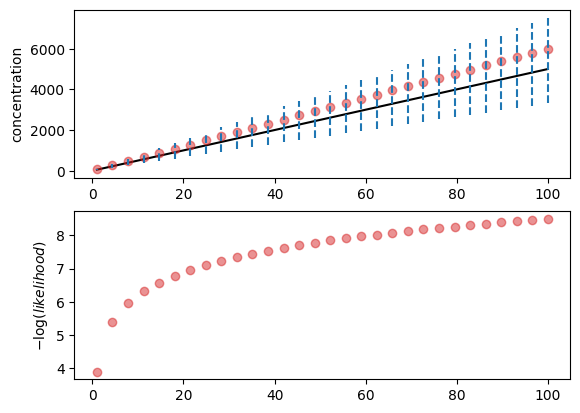

In [52]:
RV_discrete = binom(p=[0.1,0.2,0.4,0.2,0.1], n=10)

sd = 0.25
RV_continuous = lognorm(scale=1.5, s=sd)

np.log(RV_continuous.pdf([0.5,1.0,1.5,2.0,2.5])).sum()

pmf = np.log(RV_discrete.pmf([2,2,2,0,4]))
print(pmf)

x = np.linspace(1, 100, 30)
y = x * 50

fig, (ax1, ax2) = plt.subplots(2,1)
Y_hat = lognorm(scale=y*1.5, s=0.6)

ax1.plot(x, y, color="black")

y_obs = y*1.2
likelihood = lognorm(scale=y, s=sd).pdf(y_obs)
# likelihood = norm(loc=y, scale=sd).pdf(y_obs)

print(np.log(likelihood))
ax1.plot(x, y_obs, ls="", marker="o", color="tab:red", alpha=.5)
y_p05 = [lognorm(scale=y_, s=sd).ppf(0.05) for y_ in y]
y_p95 = [lognorm(scale=y_, s=sd).ppf(0.95) for y_ in y]
ax1.vlines(x, y_p05, y_p95, ls="--")
ax1.set_yscale("linear")
ax1.set_ylabel("concentration")
ax2.set_ylabel(r"$- \log(likelihood)$")
ax2.plot(x, -np.log(likelihood), ls="", marker="o", color="tab:red", alpha=.5)
fig.savefig("../results/likelihood.png")